<a href="https://colab.research.google.com/github/xyt556/Geo_Programme/blob/main/00_hello_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab 是一个托管的 Jupyter notebook 环境，允许任何人通过网络浏览器运行 Python 代码。它为您的 Python 代码提供免费的计算和数据存储。

您可以点击 `+Code` 按钮创建一个新的单元格并输入一段代码。要运行代码，请点击单元格旁边的 **Run Code** 按钮，或按 `Shift+Enter` 键。

In [ ]:
print('Hello World')

In [ ]:
!pip install geopandas

### 包管理

在 Google Colab 中，您可以使用标准的 Python 包管理工具如 `pip` 来管理包。以下是一些常见的任务：

- **安装包**：使用 `!pip install package_name` 来安装新包。
- **升级包**：使用 `!pip install --upgrade package_name` 来升级现有包。
- **卸载包**：使用 `!pip uninstall package_name` 来移除包。

例如，要安装 `numpy` 包，您可以运行：

```python
!pip install numpy
```

包管理工具可以帮助您轻松地安装、升级和卸载软件包，确保您的项目依赖项始终是最新的，并且可以避免手动管理依赖项的麻烦。

(1) Package management basics - Learn web development | MDN - MDN Web Docs. https://developer.mozilla.org/en-US/docs/Learn/Tools_and_testing/Understanding_client-side_tools/Package_management.
(2) Package manager - Wikipedia. https://en.wikipedia.org/wiki/Package_manager.
(3) Package Management Essentials: apt, yum, dnf, pkg. https://www.digitalocean.com/community/tutorials/package-management-basics-apt-yum-dnf-pkg.

Google Colab 预装了许多 Python 包。您只需导入它们即可使用。

In [ ]:
import pandas as pd

每个 Colab 笔记本实例都在云中的 Ubuntu Linux 机器上运行。如果您想安装任何包，可以在命令前加上 `!` 来运行。例如，您可以使用 `pip` 命令通过 `!pip` 安装第三方包。

> 提示：如果您想列出 Colab 环境中所有预安装的包及其版本，可以运行 `!pip list -v`。

In [ ]:
!pip install --quiet rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 14.6 MB/s eta 0:00:00


In [ ]:
import rioxarray

有些包可能还需要额外的二进制文件或本地配置。这可以通过使用 Ubuntu Linux 的包管理命令来实现。例如，我们可以运行 `apt` 命令来安装 `geopandas` 所需的特定包，以确保其正常工作。

For example, to install the necessary dependencies for `geopandas`, you might run:

```bash
!apt-get install -y libspatialindex-dev
```

This ensures that all required components are available for `geopandas` to function properly. If you have any specific packages or configurations in mind, feel free to ask!

(1) Top 20 APT Commands: Your Guide to Ubuntu and Debian Package Management. https://linuxconfig.org/top-20-apt-commands-your-guide-to-ubuntu-and-debian-package-management.
(2) Package management | Ubuntu. https://ubuntu.com/server/docs/package-management.
(3) Ubuntu Package Managers Overview - phoenixNAP. https://phoenixnap.com/kb/ubuntu-package-manager.
(4) Linux package management with YUM and RPM - Enable Sysadmin. https://www.redhat.com/sysadmin/how-manage-packages.
(5) Top 3 Command Line Ubuntu Package Manager tools - Linux Shout. https://linux.how2shout.com/top-3-command-line-ubuntu-package-manager-tools/.

In [ ]:
!apt install -qq libspatialindex-dev
!pip install --quiet fiona shapely pyproj rtree
!pip install --quiet geopandas

libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
import geopandas as gpd

### 数据管理

Colab 提供 100GB 的磁盘空间，可与您的笔记本一起使用。这些空间可以用于存储您的数据、中间输出和结果。

以下代码将在您的本地文件系统中创建名为 'data' 和 'output' 的两个文件夹。

(1) Google Colab disk space vs Google Drive disk space - What’s the .... https://brianhhough.com/howto/google-colab-disk-space-vs-google-drive-disk-space-difference.
(2) How to manage your Google Colab state and storage - brev.dev. https://www.brev.dev/blog/managing-no-space-left-on-the-device-in-google-colab.
(3) Monitoring Resource Utilization in Google Colab - brev.dev. https://brev.dev/blog/monitoring-resource-utilization-in-google-colab.

In [ ]:
import os

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

我们可以从互联网上下载一些数据并将其存储在 Colab 环境中。下面是一个使用 `urllib` 从 URL 获取文件的辅助函数。

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

让我们从 Natural Earth 下载 [Populated Places](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/) 数据集。

(1) Natural Earth » Blog Archive » Populated Places - Free vector and .... https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/.
(2) Natural Earth - Free vector and raster map data at 1:10m, 1:50m, and 1 .... https://www.naturalearthdata.com/.
(3) GitHub - nvkelso/natural-earth-vector: A global, public domain map .... https://github.com/nvkelso/natural-earth-vector.
(4) Natural Earth » Blog Archive » Populated Places - Free vector and .... https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/.

In [ ]:
download('https://naciscdn.org/naturalearth/10m/cultural/' +
         'ne_10m_populated_places_simple.zip')

Downloaded data/ne_10m_populated_places_simple.zip


文件现在在我们的本地文件系统中。我们可以构建数据文件夹的路径，并使用 `geopandas` 读取它。

In [ ]:
import geopandas as gpd

In [ ]:
file = 'ne_10m_populated_places_simple.zip'
filepath = os.path.join(data_folder, file)
places = gpd.read_file(filepath)
places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,None,None,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,0,...,21093,21093,0.0,7,7,None,None,9.0,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,0,...,23279,23279,0.0,7,7,None,None,9.0,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,0,...,19698,19698,0.0,6,6,None,None,9.0,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,0,...,32234,32234,0.0,7,7,None,None,7.0,1159112703,POINT (-56.21500 -34.09900)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,0,600,1.0,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,0,...,11748000,2010175,1821489.0,14,12,Rio de Janeiro,Rio de Janeiro,1.7,1159151619,POINT (-43.21212 -22.90731)
7338,0,600,1.0,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,0,...,18845000,10021295,11522944.0,14,14,S,Sao Paolo,3.0,1159151621,POINT (-46.62697 -23.55673)
7339,0,600,3.0,Admin-1 capital,Sydney,None,None,Sydney,0,0,...,4630000,3641422,2669348.0,12,12,Sydney,Sydney1,1.7,1159151623,POINT (151.21255 -33.87137)
7340,0,600,0.0,Admin-0 capital,Singapore,None,None,Singapore,1,0,...,5183700,3289529,3314179.0,13,12,Singapore,Singapore,2.1,1159151627,POINT (103.85387 1.29498)


<Axes: >

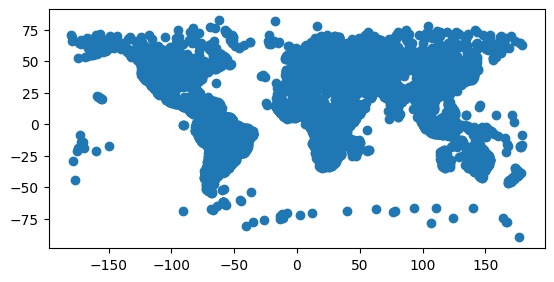

In [ ]:
places.plot()

In [ ]:
a=2
b=3
c=a+b
c


5

让我们进行一些数据处理，并将结果写入一个新文件。下面的代码将筛选出所有同时也是国家首都的地点。

In [ ]:
capitals = places[places['adm0cap'] == 1]
capitals

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430.0,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0.0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.93610)
4833,7,20,0.0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009.0,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219.0,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13000 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,None,None,Palikir,1,0,...,4645,4645,0.0,4,4,None,Palikir,6.0,1159149061,POINT (158.14997 6.91664)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,0,600,3.0,Admin-0 capital,Cairo,None,Al-Qahirah,Cairo,1,0,...,11893000,7734614,13720557.0,14,13,Al-Qahirah,Cairo,1.7,1159151603,POINT (31.24802 30.05191)
7332,0,600,2.0,Admin-0 capital,Tokyo,None,None,Tokyo,1,0,...,35676000,8336599,12945252.0,14,13,Tokyo,Tokyo,1.7,1159151609,POINT (139.74946 35.68696)
7334,0,600,3.0,Admin-0 capital,Paris,None,None,Paris,1,0,...,9904000,11177,7142744.0,13,6,Paris,Paris,1.7,1159151613,POINT (2.35299 48.85809)
7335,0,600,3.0,Admin-0 capital,Santiago,None,None,Santiago,1,0,...,5720000,46611,3066651.0,13,7,Santiago,Santiago3,2.0,1159151615,POINT (-70.65050 -33.44021)


我们可以将结果写入磁盘，保存为 GeoPackage 文件。

In [ ]:
output_file = 'capitals.geojson'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GeoJSON', filename=output_path)

您可以从 Colab 左侧面板中打开 **Files** 选项卡，浏览到 `output` 文件夹。找到 `capitals.gpkg` 文件，点击 **⋮** 按钮，然后选择 *Download* 以将文件下载到本地。